# Programming Problem:

In this problem, you will write a program to estimate the parameters for an unknown polynomial using
the polyfit() function of the numpy package.

1) Please plot the noisy data and the polynomial you found (in the same figure). Please use polynomial order of m = 1, 2, 3, 4, 5, 6, 7, 8, respectively.
2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.
3) Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the best m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure for EACH choice of noise_scale.]
4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the best m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure for EACH choice of number_of_samples.]


### Please use the following code at the beginning of your program to generate the data.
### Simulated data is given as follows in Python:
<!-- import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')
 -->

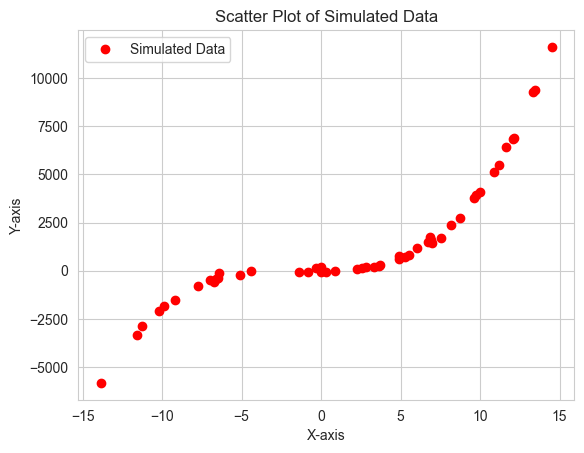

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
    
# plot_simulated_data(noise_scale=100, number_of_samples=50)
# # # Set the style to 'whitegrid' in Seaborn
sns.set_style("whitegrid")
Noise_scale = 100
Number_of_samples = 50

def generate_simulated_data(noise_scale=100, number_of_samples=50):
    # Generate simulated data
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
    return x, y

def plot_simulated_data(x, y):
    # Create a scatter plot
    plt.plot(x, y, 'ro', label='Simulated Data')

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Simulated Data')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

    
    
x,y = generate_simulated_data(noise_scale=Noise_scale, number_of_samples=Number_of_samples)
plot_simulated_data(x,y)

# Part 1: Plot noisy data and polynomials for different orders (m)


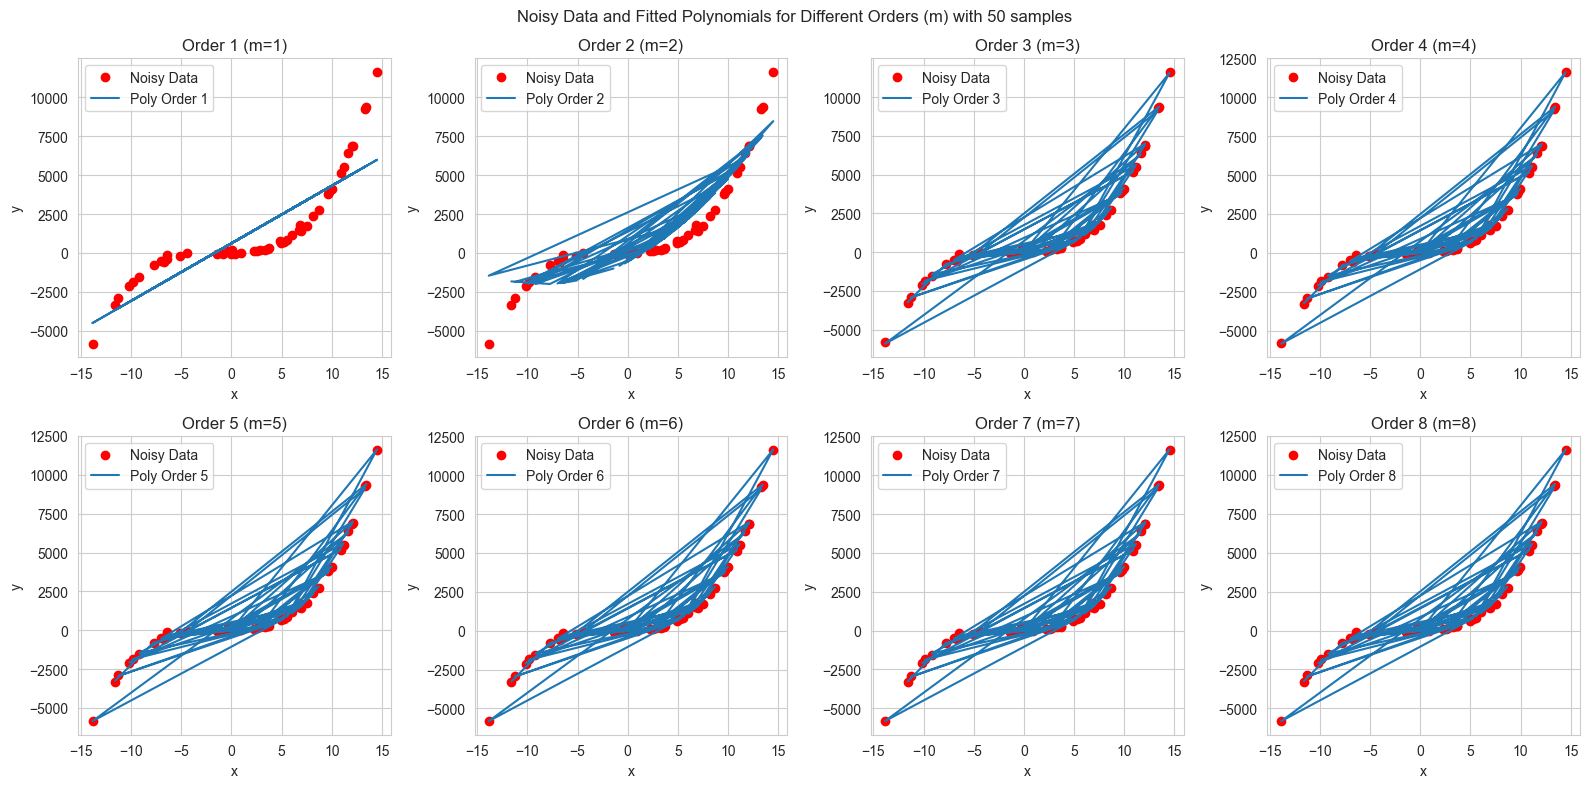

In [2]:
# # Part 1: Plot noisy data and polynomials for different orders (m)

def plot_polynomials_for_orders(x, y, m_values=range(1, 9),number_of_sample = 50):
    """
    Parameters:
    x (array-like): Input data.
    y (array-like): Corresponding target values.
    m_values (list): List of polynomial orders to plot.

    """
    # Create subplots for each polynomial order
    num_cols = min(len(m_values), 4)
    num_rows = (len(m_values) + num_cols - 1) // num_cols  # Calculate the number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
    fig.suptitle(f'Noisy Data and Fitted Polynomials for Different Orders (m) with {number_of_sample} samples')

    for i, m in enumerate(m_values):
        row, col = i // num_cols, i % num_cols
        #row, col = i // 4, i % 4 if len(m_values) > 1 else 0
        ax = axs[row, col]

        ax.plot(x, y, 'ro', label='Noisy Data')

        p = np.polyfit(x.flatten(), y.flatten(), m)
        y_pred = np.polyval(p, x)
        ax.plot(x, y_pred, label=f'Poly Order {m}')

        ax.set_title(f'Order {m} (m={m})')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()

    plt.tight_layout()
    plt.show()


m_values = range(1, 9)
plot_polynomials_for_orders(x, y, m_values)


In [3]:
# Function to calculate Mean Squared Error (MSE)
# def calculate_mse(y_true, y_pred):
#     return ((y_true - y_pred) ** 2).mean()

def calculate_mse(true_values, predicted_values):
    # Calculate the Mean Squared Error (MSE)
    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)
    squared_errors = (true_values - predicted_values) ** 2
    mse = np.mean(squared_errors)
    return mse

# Part 2: Plot MSE versus order m and identify the best choice of m


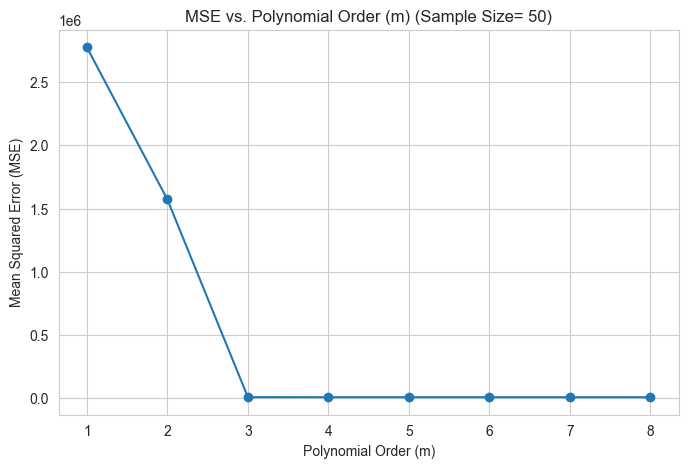

Best choice of m: 8
MSE for best m: 8765.721952282183


In [4]:
# # Part 2: Plot MSE versus order m and identify the best choice of m

mse_values_noise = {}
mse_vs_order_diff_sample = {}
def plot_mse_vs_order(x, y, m_values,noise=0,number_of_samples=50):
    mse_values = []

    for m in m_values:
        p = np.polyfit(x.flatten(), y.flatten(), m)
        y_pred = np.polyval(p, x)
        mse = calculate_mse(y, y_pred)
        mse_values.append(mse)
    
    mse_values_noise[noise]=mse_values
    mse_vs_order_diff_sample[number_of_samples] = mse_values_noise[noise]
    

    
    plt.figure(figsize=(8, 5))
    plt.plot(m_values, mse_values, marker='o', linestyle='-')
    plt.title(f'MSE vs. Polynomial Order (m) (Sample Size= {number_of_samples})')
    plt.xlabel('Polynomial Order (m)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.show()

    best_m = m_values[np.argmin(mse_values)]
    print(f'Best choice of m: {best_m}')
    print(f'MSE for best m: {mse_values[best_m - 1]}')
    
#     return mse_values


# x and y are your data arrays, m_values is the list of polynomial orders
plot_mse_vs_order(x, y, m_values,100)



### Part 3 : Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the best m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure for EACH choice of noise_scale.]


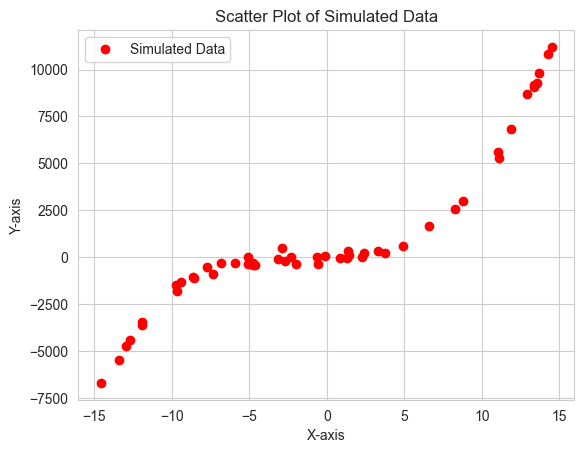

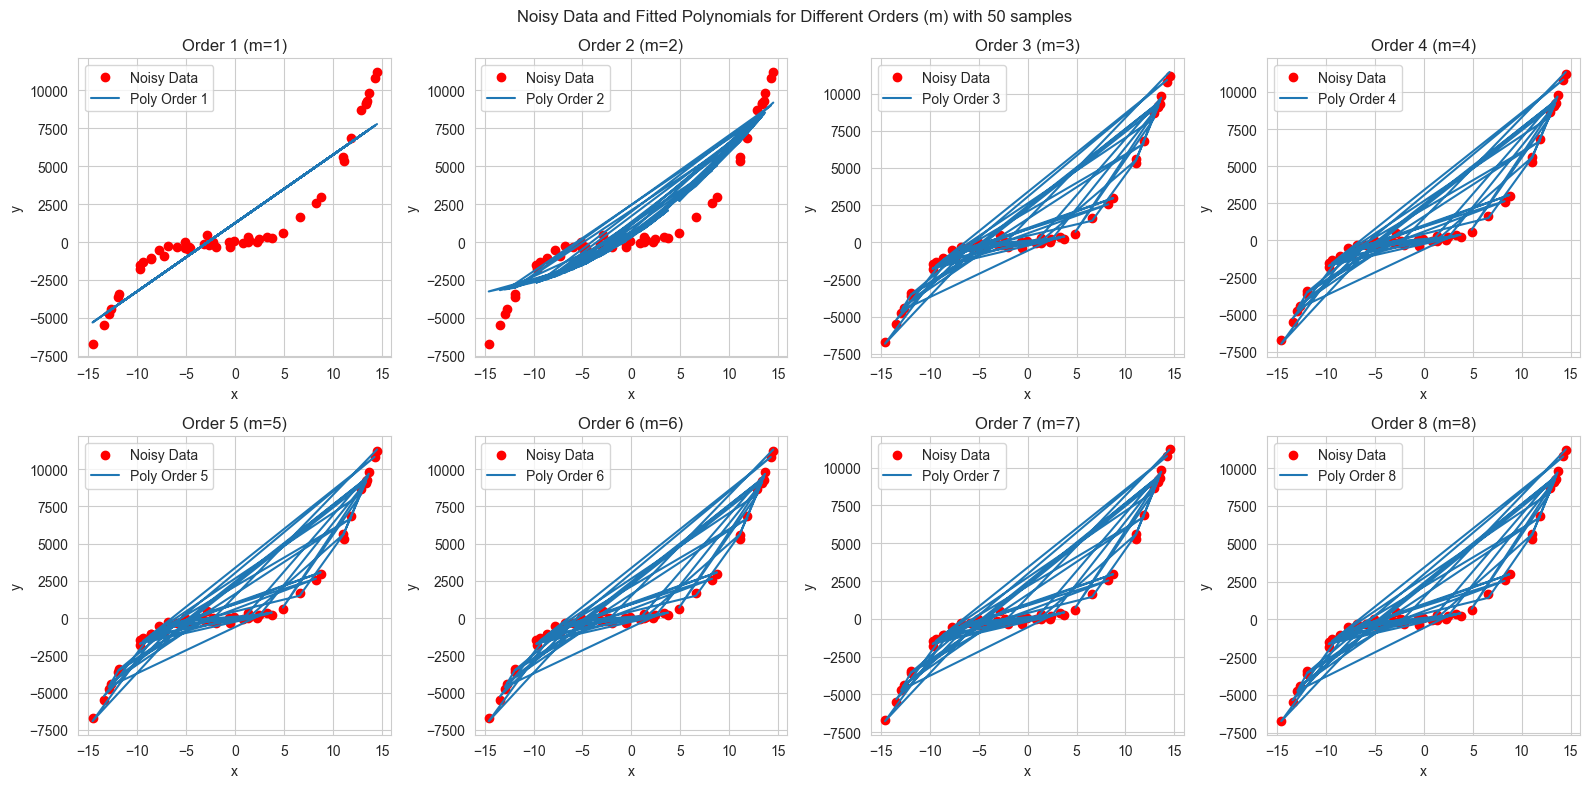

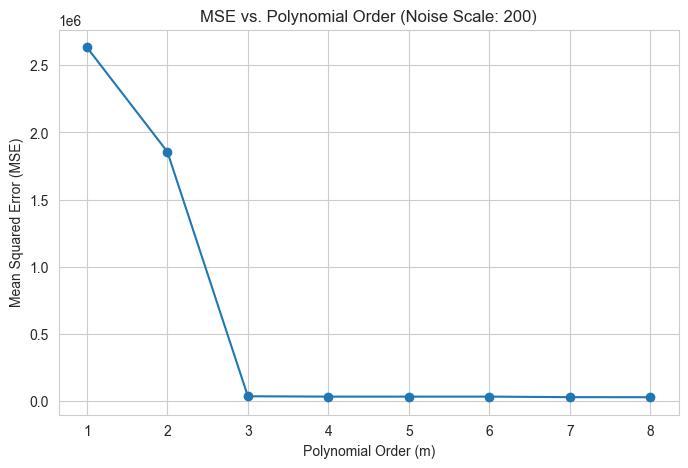

Best choice of m for Noise Scale 200: 8
MSE for best m: 29194.56167932297
--------------------------------------


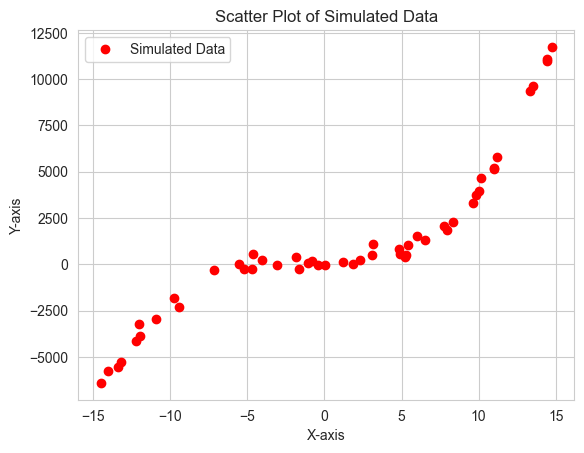

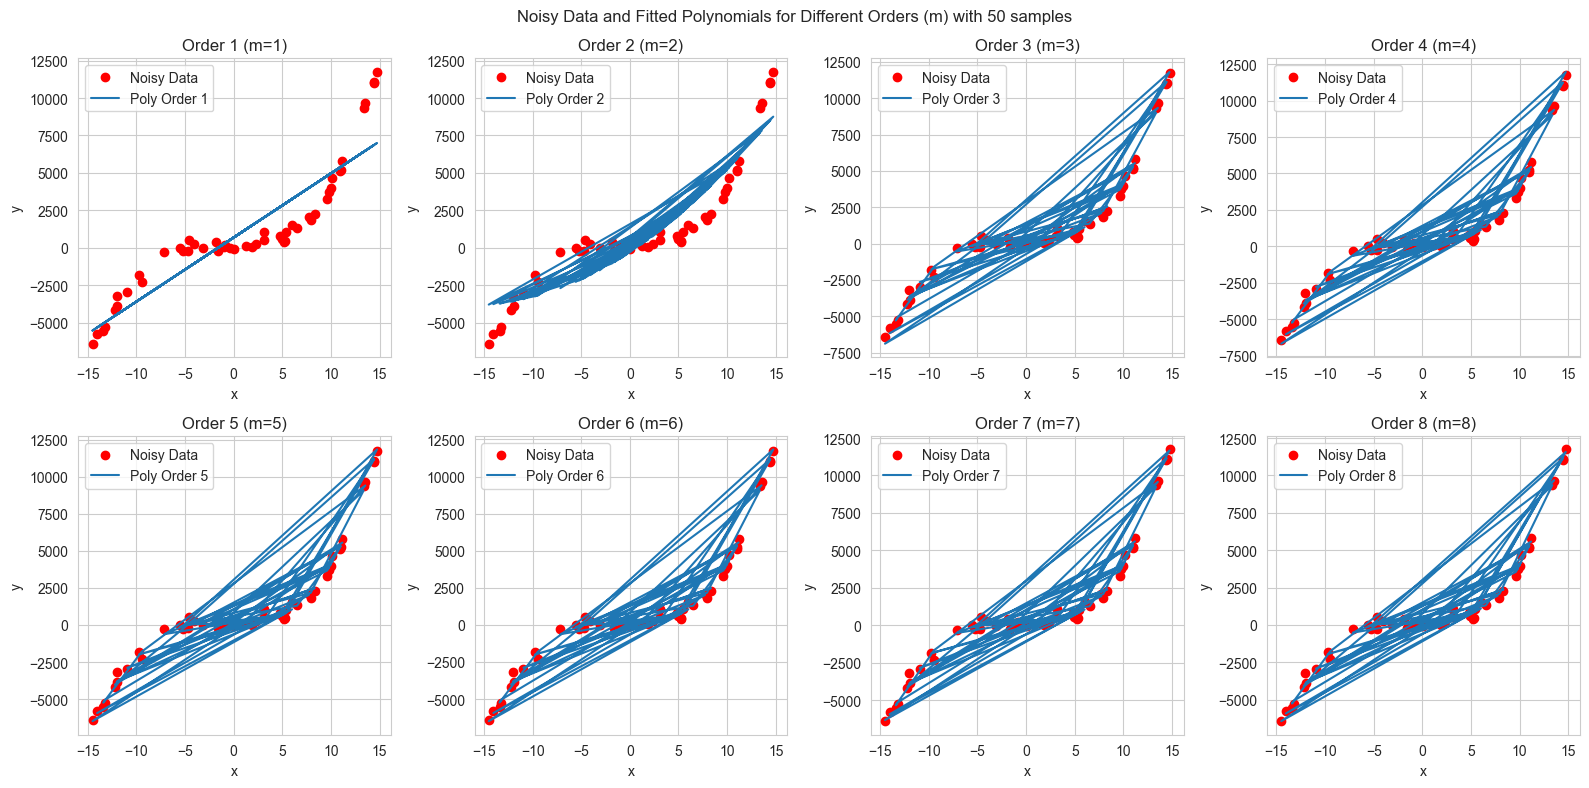

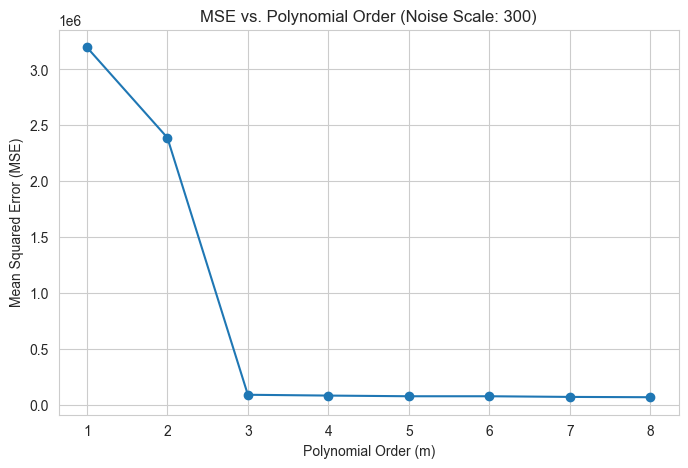

Best choice of m for Noise Scale 300: 8
MSE for best m: 68204.87528812242
--------------------------------------


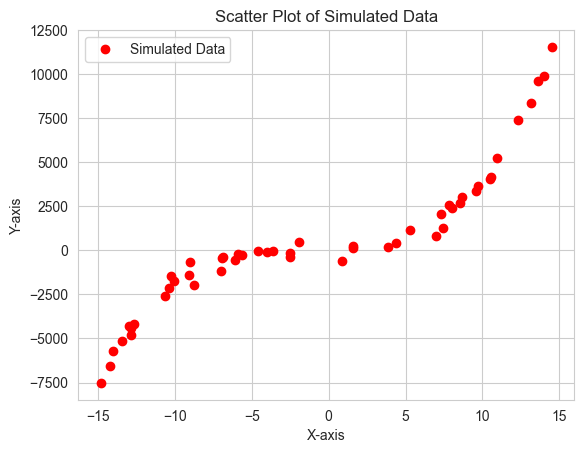

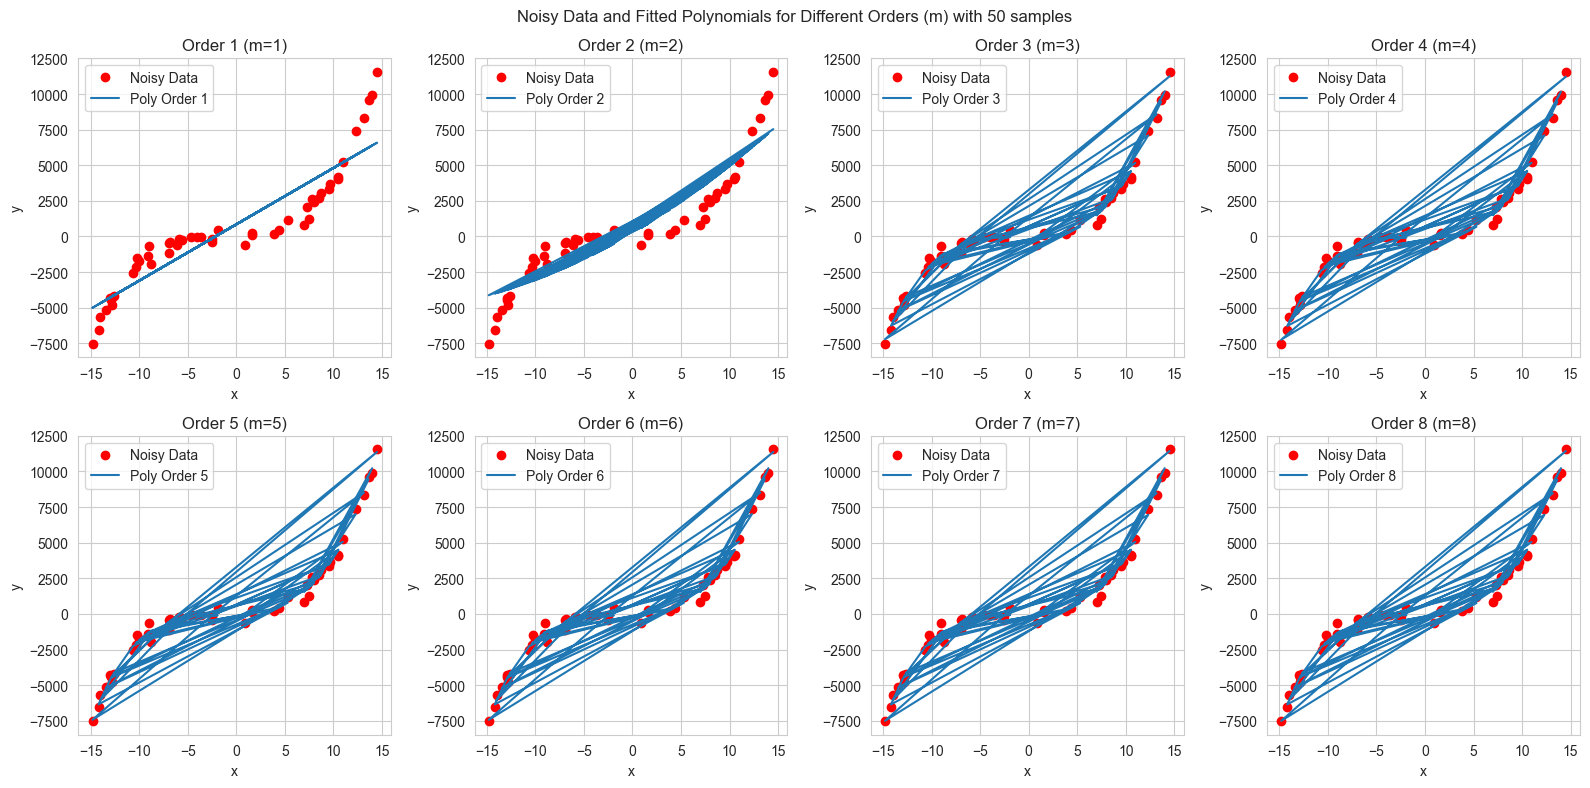

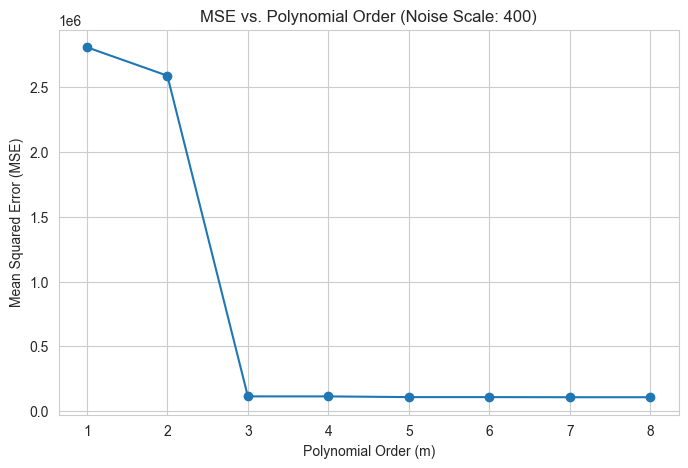

Best choice of m for Noise Scale 400: 8
MSE for best m: 106854.78619650341
--------------------------------------


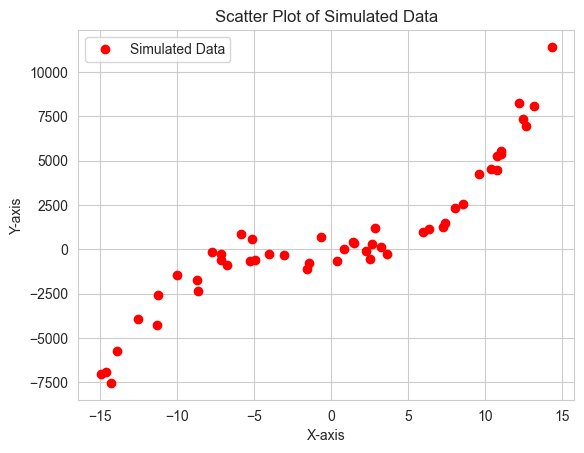

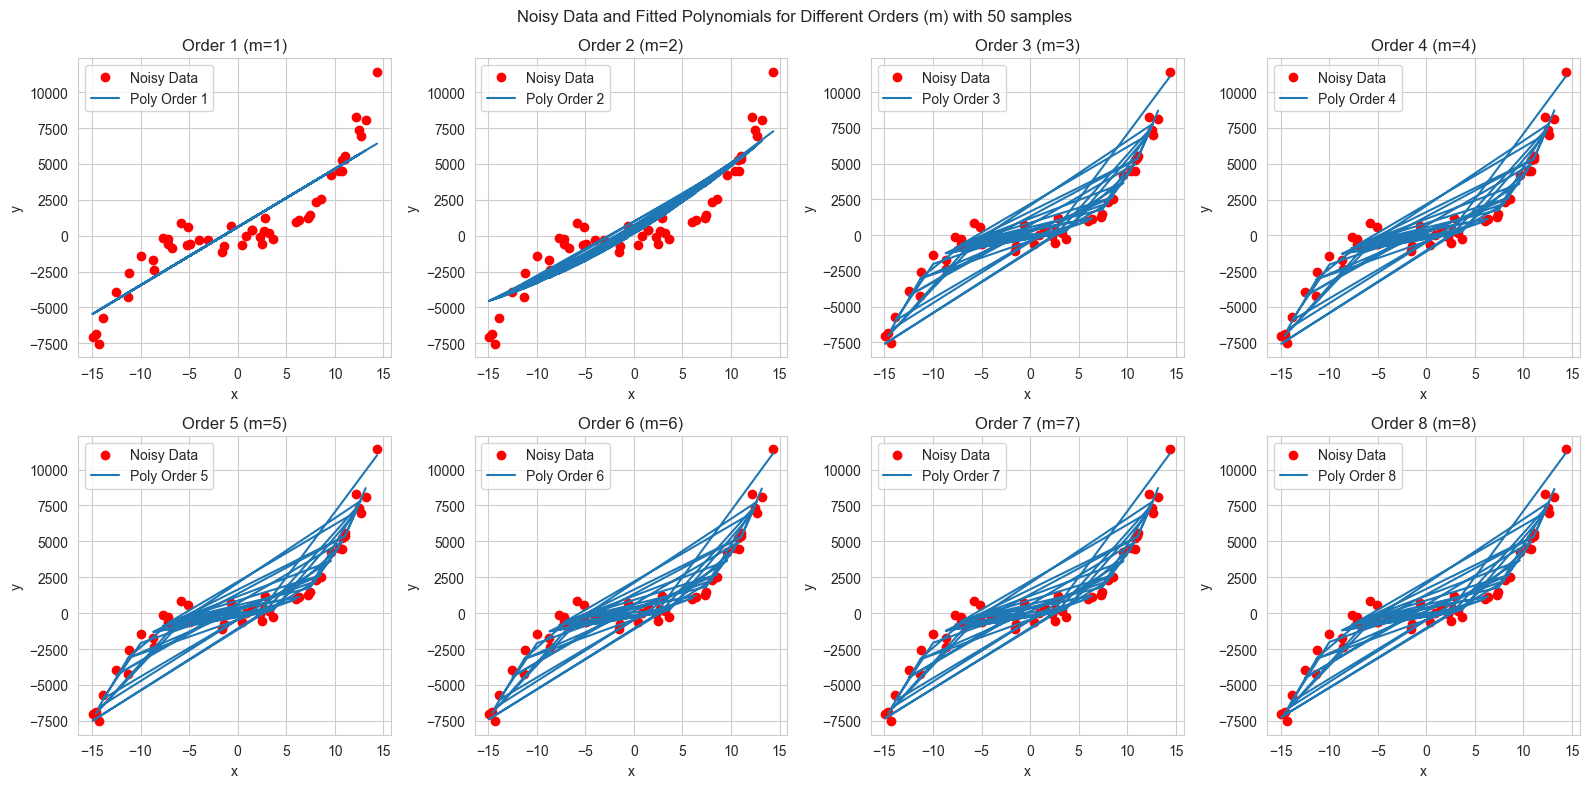

Best choice of m for Noise Scale 600: 8
MSE for best m: 322112.1095074245
--------------------------------------


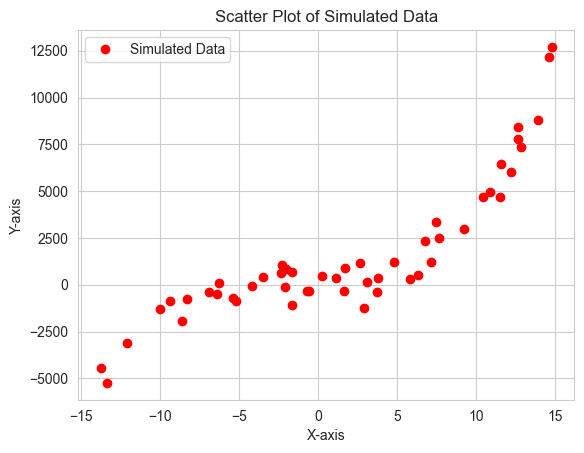

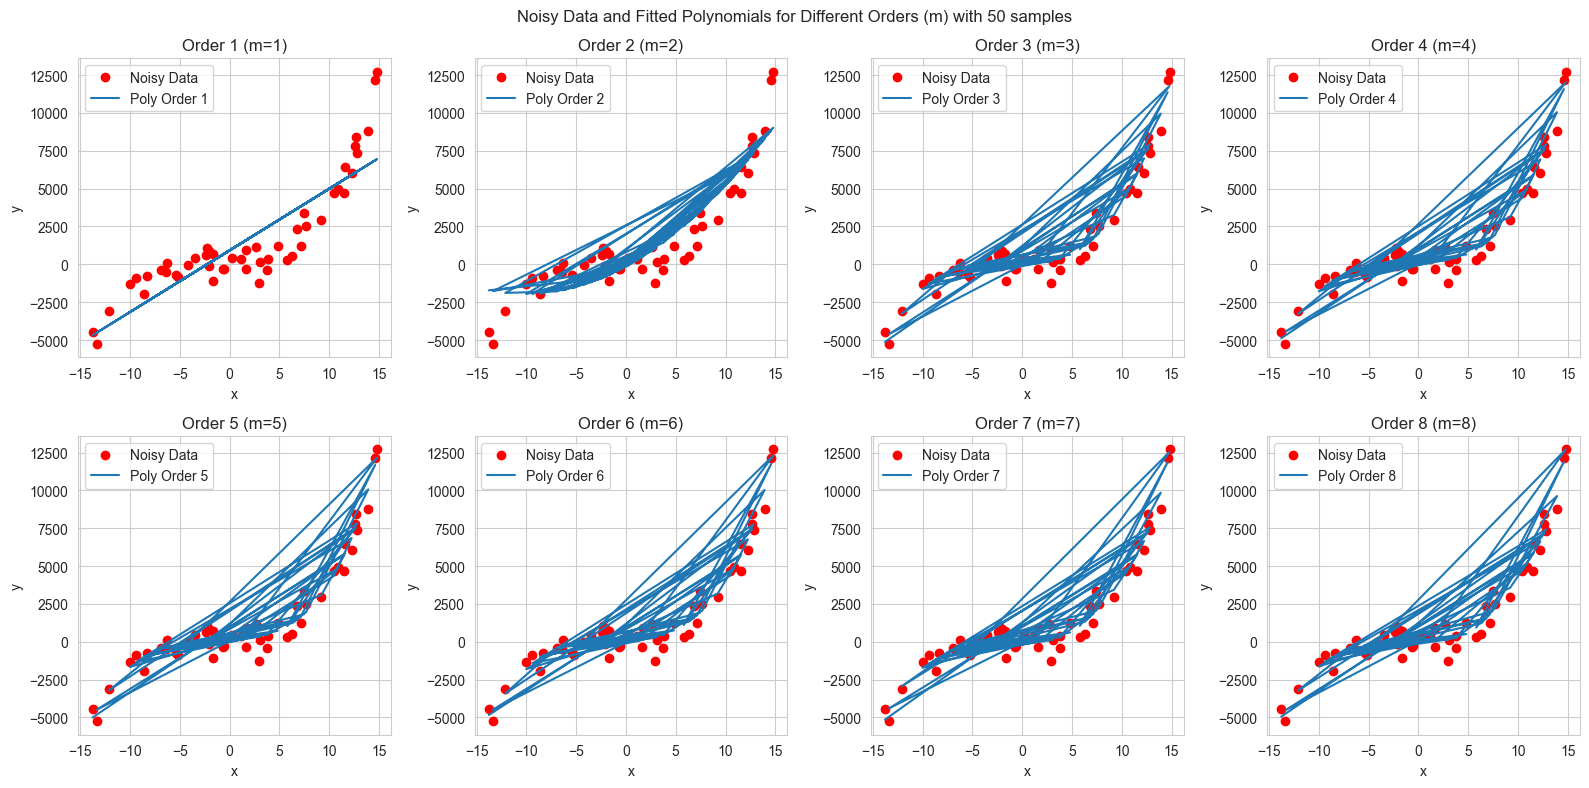

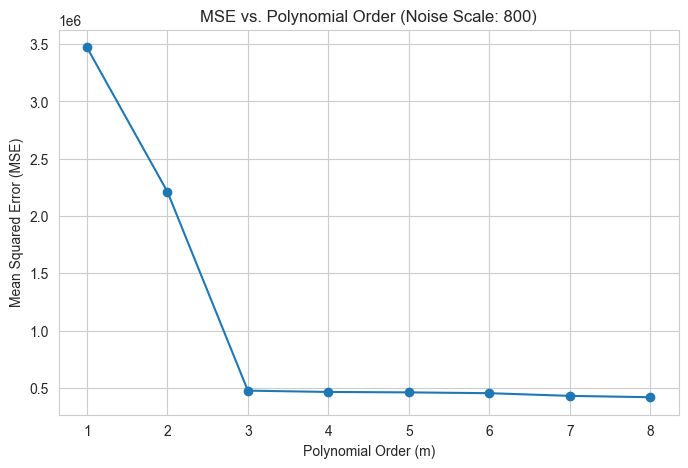

Best choice of m for Noise Scale 800: 8
MSE for best m: 419903.3721889183
--------------------------------------


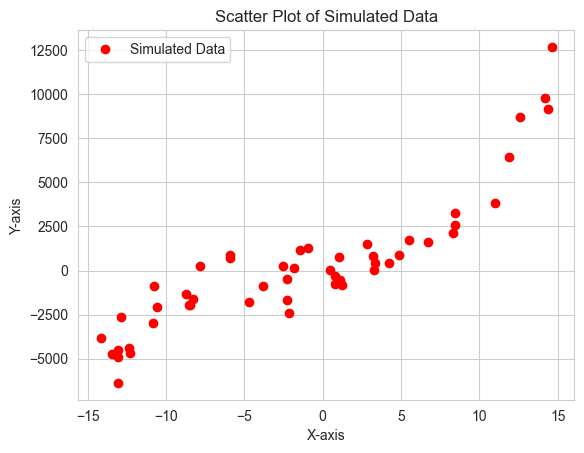

Best choice of m for Noise Scale 1000: 8
MSE for best m: 859473.6110955594
--------------------------------------


In [5]:
#Part 3 Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and 
#plot the polynomials with the best m found in 2). Discuss the impact of noise scale to the
#accuracy of the returned parameters. [You need to plot a figure for EACH choice of noise_scale.]


def plot_polynomials_for_noise_scales(noise_scales, number_of_samples=50):
    
    for noise_scale in noise_scales:
        # Generate simulated data with the current noise scale
        x, y = generate_simulated_data(noise_scale=noise_scale)

        # Plot the simulated data
        plot_simulated_data(x, y)

        # Plot noisy data and fitted polynomials for different orders (m)
        m_values = range(1, 9)
        plot_polynomials_for_orders(x, y, m_values)

        # Plot MSE versus order m and identify the best choice of m
        mse_values = []
        for m in m_values:
            p = np.polyfit(x.flatten(), y.flatten(), m)
            y_pred = np.polyval(p, x)
            mse = calculate_mse(y, y_pred)
            mse_values.append(mse)

        mse_values_noise[noise_scale] = mse_values

        plt.figure(figsize=(8, 5))
        plt.plot(m_values, mse_values, marker='o', linestyle='-')
        plt.title(f'MSE vs. Polynomial Order (Noise Scale: {noise_scale})')
        plt.xlabel('Polynomial Order (m)')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.grid(True)
        plt.show()

        best_m = m_values[np.argmin(mse_values)]
        print(f'Best choice of m for Noise Scale {noise_scale}: {best_m}')
        print(f'MSE for best m: {mse_values[best_m - 1]}')
        print('--------------------------------------')

#     return mse_values_noise


noise_scales = [200, 300, 400, 600, 800, 1000]
plot_polynomials_for_noise_scales(noise_scales)


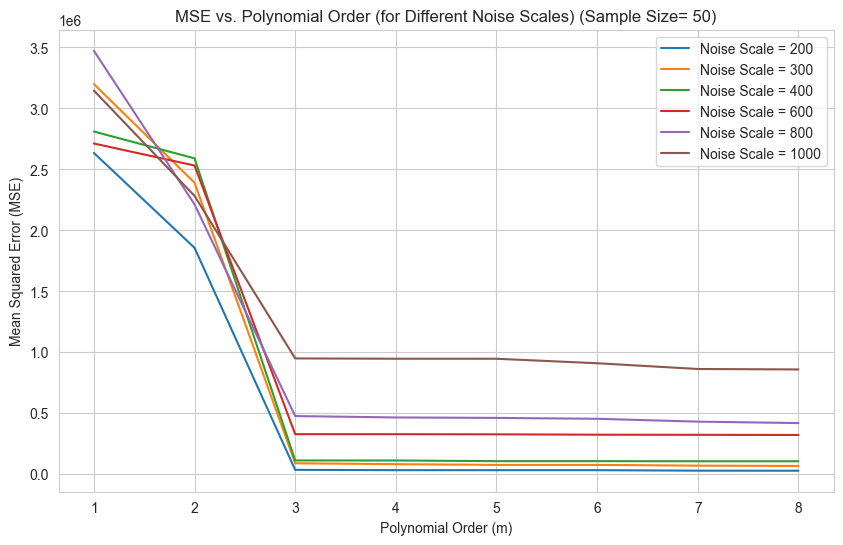

In [6]:
# Plot MSE vs. m for each noise scale

def plot_mse_vs_noise_scales(m_values, mse_values_noise, noise_scales,number_of_sample=50):
    plt.figure(figsize=(10, 6))
    for i, noise_scale in enumerate(noise_scales):
        plt.plot(m_values, mse_values_noise[noise_scale], label=f'Noise Scale = {noise_scale}')

    plt.title(f'MSE vs. Polynomial Order (for Different Noise Scales) (Sample Size= {number_of_sample})')
    plt.xlabel('Polynomial Order (m)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
noise_scales = [200, 300, 400, 600, 800, 1000]
plot_mse_vs_noise_scales(m_values, mse_values_noise, noise_scales)


From the above graph, we can deduce that Higher noise scales leads to overfitting and higher MSE, while lower noise scales allow for a better fit of the underlying pattern and lower MSE. The best choice of polynomial order depends on finding a balance between capturing the true signal and avoiding overfitting due to noise.

# PART 4

Running experiment for 40 samples...


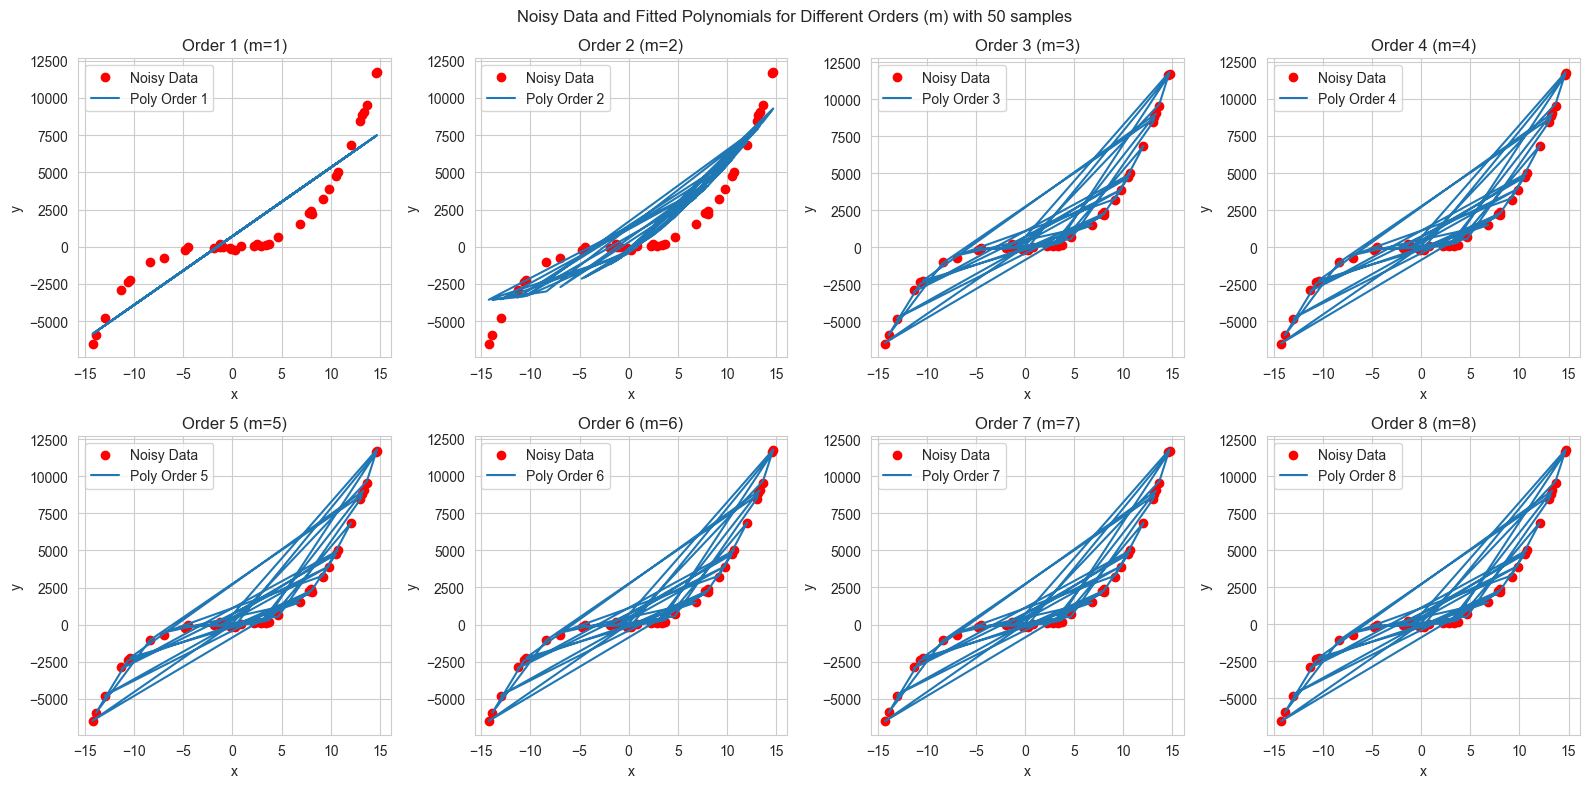

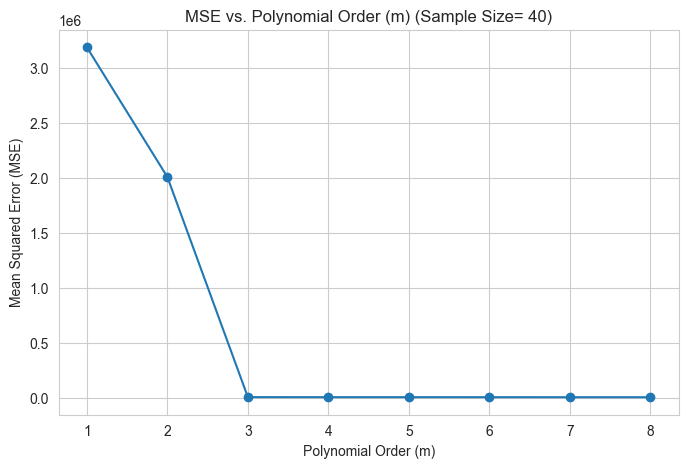

Best choice of m: 8
MSE for best m: 8052.553291088178
Running experiment for 30 samples...


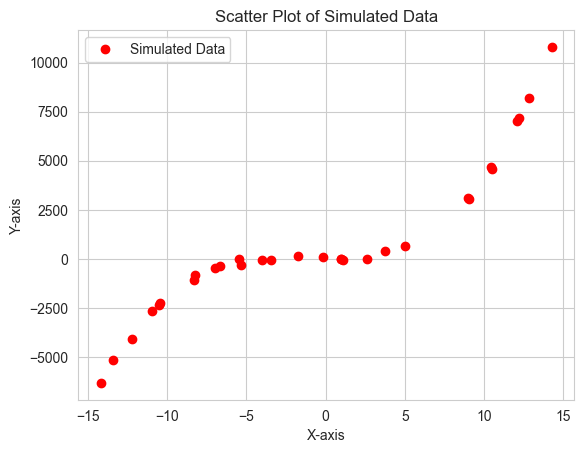

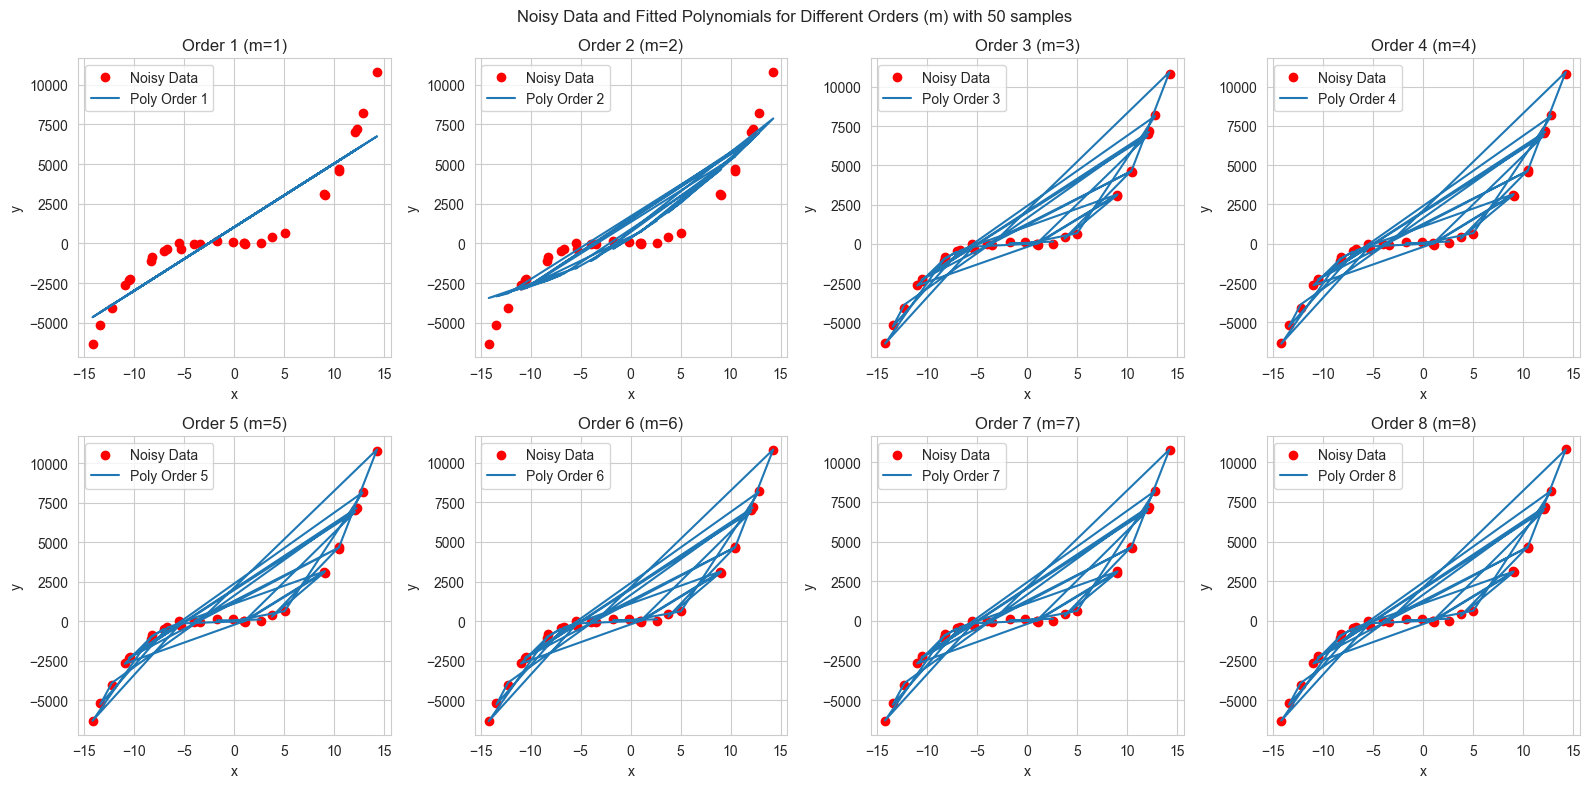

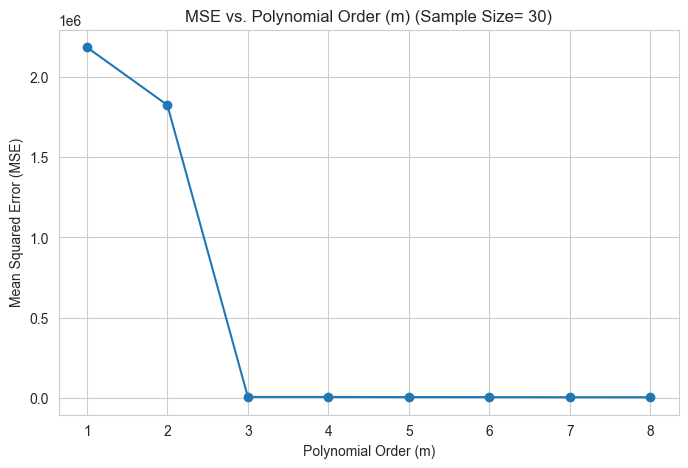

Best choice of m: 8
MSE for best m: 7179.650550085608
Running experiment for 20 samples...


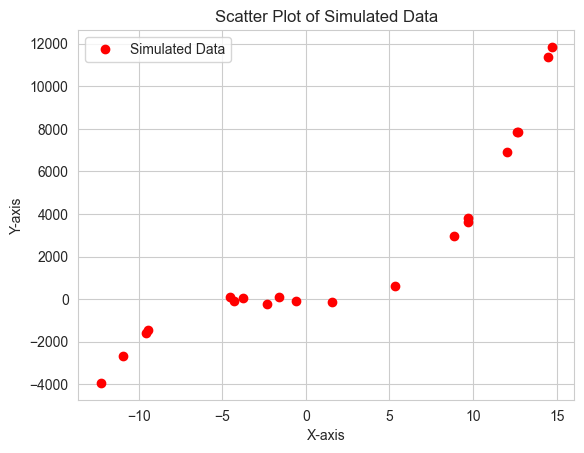

Best choice of m: 8
MSE for best m: 6568.618801203427
Running experiment for 10 samples...


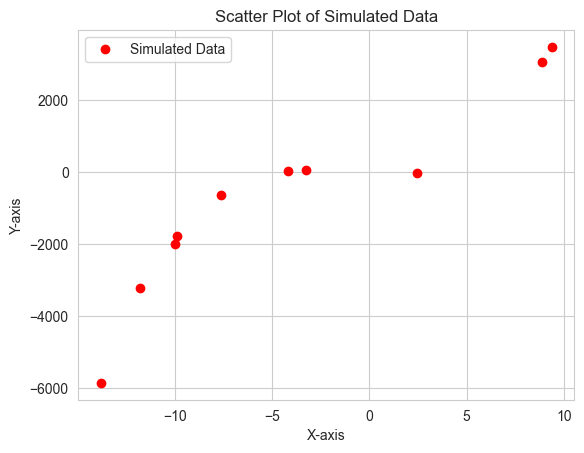

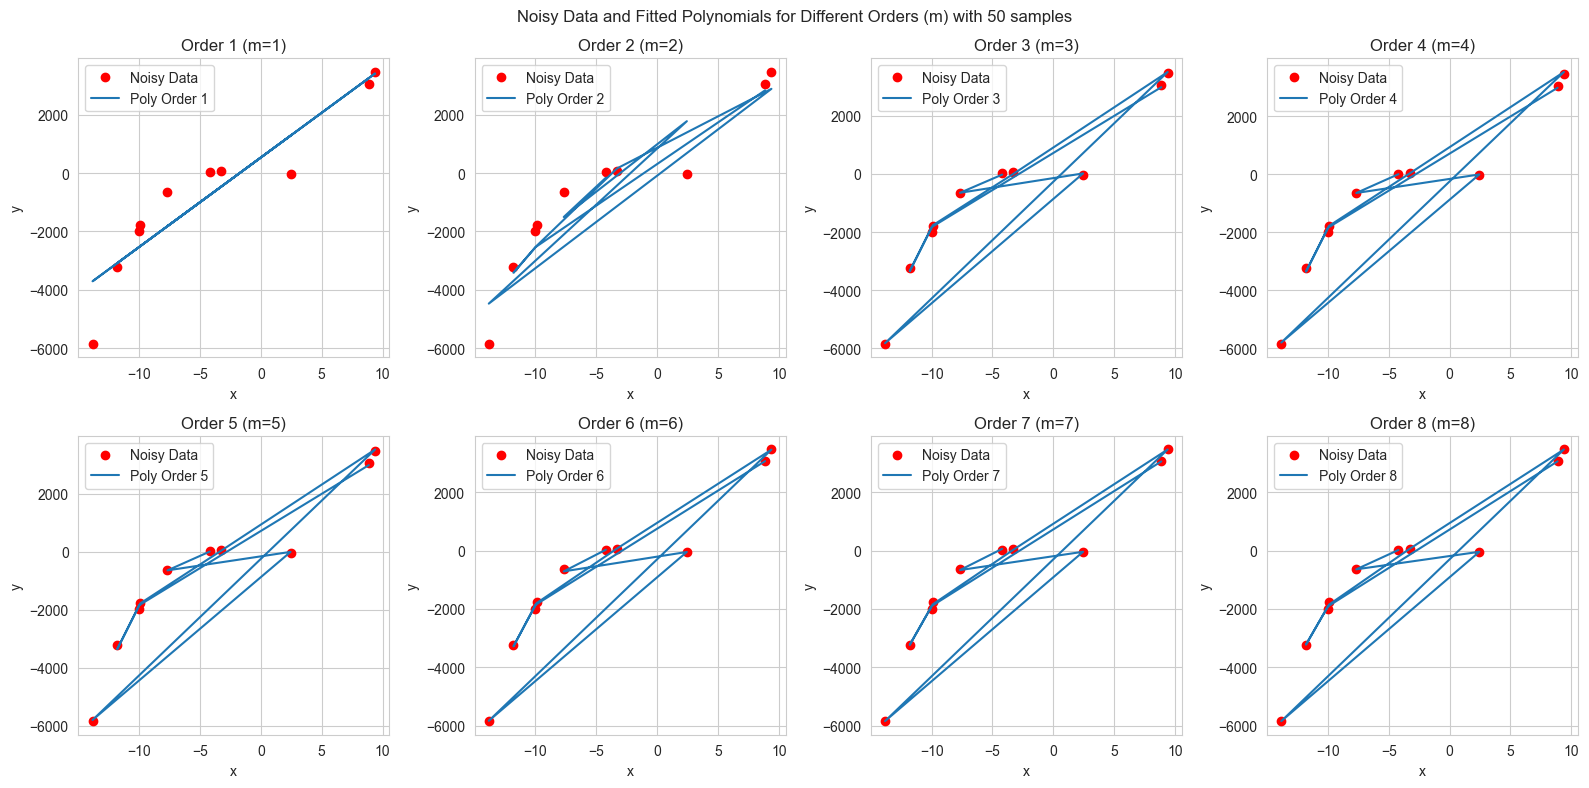

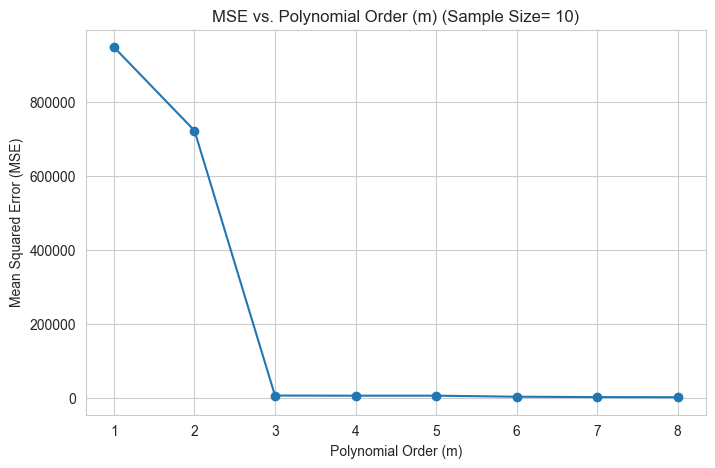

Best choice of m: 8
MSE for best m: 1065.4582076123165


In [7]:
# mse_vs_order_diff_sample = {}

def run_experiment(sample_sizes, noise_scale=100):
    for num_samples in sample_sizes:
        print(f"Running experiment for {num_samples} samples...")
        x, y = generate_simulated_data(noise_scale=noise_scale, number_of_samples=num_samples)
        plot_simulated_data(x, y)
        
        m_values = range(1, 9)
        plot_polynomials_for_orders(x, y, m_values)
        plot_mse_vs_order(x, y, m_values, noise=noise_scale, number_of_samples=num_samples)

run_experiment([40, 30, 20, 10], noise_scale=100)

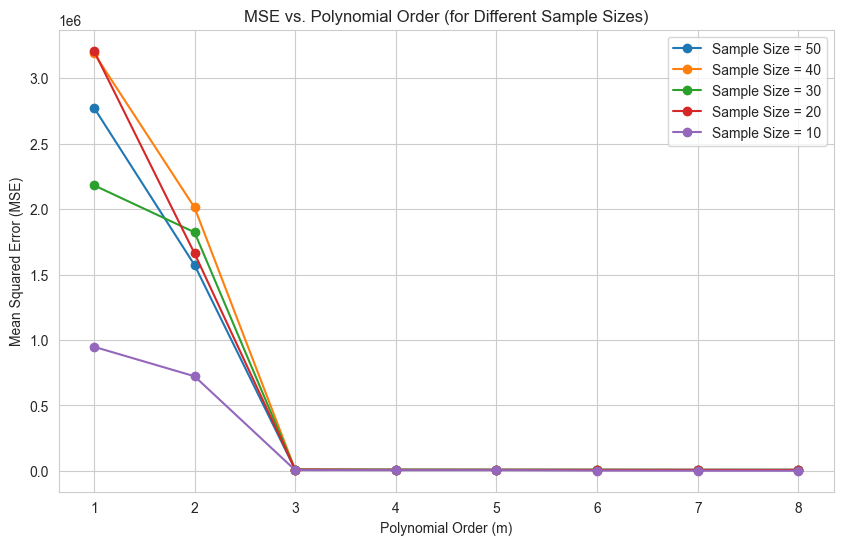

In [8]:

def plot_mse_vs_order_for_different_samples(sample_sizes, noise_scale=100):
    plt.figure(figsize=(10, 6))
    m_values = range(1, 9)

    for sample_size in sample_sizes:
        if sample_size in mse_vs_order_diff_sample:
            plt.plot(m_values, mse_vs_order_diff_sample[sample_size], marker='o', linestyle='-', label=f'Sample Size = {sample_size}')
        
    plt.title('MSE vs. Polynomial Order (for Different Sample Sizes)')
    plt.xlabel('Polynomial Order (m)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

sample_sizes = [50, 40, 30, 20, 10]
plot_mse_vs_order_for_different_samples(sample_sizes, 100)
